<a href="https://colab.research.google.com/github/MateoRivera/network-dynamics/blob/main/H1/Punto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Point a

In [2]:
#Import liberries
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
#Create the graph
def create_graph():
  G = nx.DiGraph()
  G.add_edge('o', 'a', capacity=3)  # e1
  G.add_edge('o', 'b', capacity=3)  # e3
  G.add_edge('a', 'd', capacity=2)  # e2
  G.add_edge('b', 'd', capacity=2)  # e4
  G.add_edge('b', 'c', capacity=3)  # e5
  G.add_edge('c', 'd', capacity=1)  # e6
  G.add_edge('a', 'b', capacity=1)  # e7
  return G


In [ ]:
#Define graph as directed one
pos = nx.spring_layout(G)

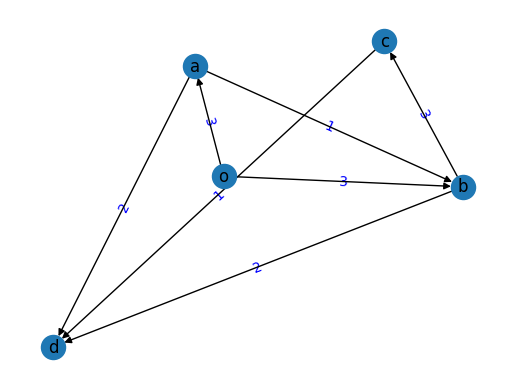

In [ ]:
nx.draw_networkx_edge_labels(G,pos,edge_labels={("o","a"):'3',("o","b"):'3',("a","d"):'2',("b","d"):'2',("b","c"):'3',("c","d"):'1',("a","b"):'1'},font_color='blue')
nx.draw(G, pos, with_labels=True) #We have two rows so it is an undirected graph

**Cuts**
- $U=\{o\},U^C=\{a,b,c,d\}$ -> $C_U = 6$
- $U=\{o,a\},U^C=\{b,c,d\}$ -> $C_U = 6$
- $U=\{o,a,b\},U^C=\{c,d\}$ -> $C_U = 7$
- $U=\{o,a,b,c\},U^C=\{d\}$ -> $C_U = 5$

In [ ]:
nx.algorithms.flow.minimum_cut(G,"o","d")

(5, ({'a', 'b', 'c', 'o'}, {'d'}))

## Point b

**Max flow min cut Theorem**: the maximal flow that can send from $o$ to $d$ equals the minimal cut capacity among the o-d cuts of the network.

In [ ]:
# Current maxim flow
nx.algorithms.flow.maximum_flow(G,"o","d")
# maximum_flow returns the maximal throughput, plus a dictionary containing the value of the flow that goes through each edge.

(5,
 {'o': {'a': 3, 'b': 2},
  'a': {'d': 2, 'b': 1},
  'b': {'d': 2, 'c': 1},
  'd': {},
  'c': {'d': 1}})

The extra units of capacity must be allocated in order to remain wihout a botterlneck or finish with the extra units of capacity.

Cómo debe ser el código:
  * La capacidad se debe ir restando cada vez que se asigne
  * Calcular el min cut
  * Agregar una unidad de capacidad al nodo con capacidad minima
  actualizar las capacidades del grapho
  * volver a calcular el mincut
  ....
  * hasta que la capacidad restante sea igual a 0 todos los cuts tengan la misma capacidad

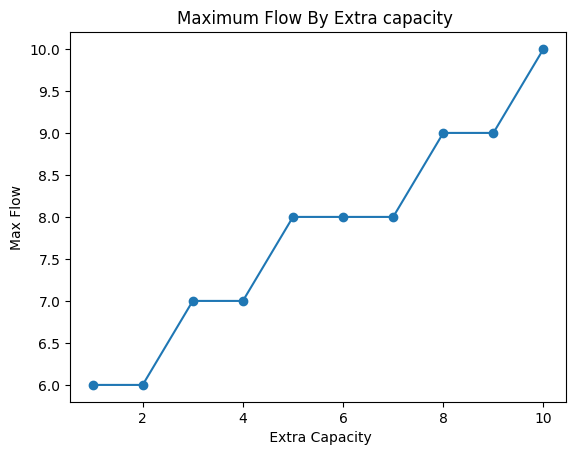

In [ ]:
def compute_max_flow_min_cut(G):

    # Compute minimum cut (capacity of the cut)
    _, partition = nx.minimum_cut(G, 'o', 'd')

    # Get the edges in the minimum cut
    reachable, non_reachable = partition


    cutset={}
    for u in reachable:
        for v in G[u]:
            if v in non_reachable:
                cutset[G[u][v]['capacity']]=(u, v)


    return cutset
max_flows = {}


G=create_graph()
i=0
while True:
    if i == 11 :
        break
    elif i>0:
        borders = compute_max_flow_min_cut(G)

        min_capacity_border = min(borders.keys())
        u,v =borders[min_capacity_border]
        G[u][v]['capacity'] += 1
        max_flows[i],_=nx.algorithms.flow.maximum_flow(G,"o","d")
    i +=1

plt.plot(max_flows.keys(), max_flows.values(), marker = 'o')

# Plot formatting
plt.xlabel(' Extra Capacity')
plt.ylabel('Max Flow')
plt.title('Maximum Flow By Extra capacity ')
plt.show()


## Point c

De acuerdo con las capacidades de las aristas, los enlaces entre los nodos a-d y c-d son los de menor capacidad, por lo que aquí se está configurando claramente un cuello de botella, de forma que si se añadiera un nuevo enlace entre a y d, se configuraría un camino directo entre a y d, ya que las capacidades entre  
o → b → d serían las mismas, y sólo restaria distribuir proporcionalmente las capacidades adicionales entre los edges que presentan cuellos de botella

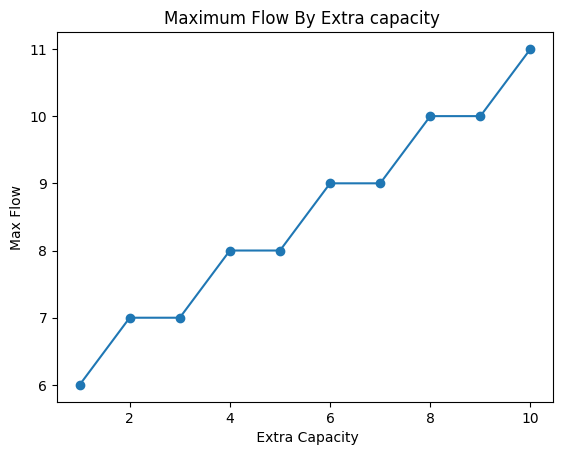

In [5]:
def compute_max_flow_min_cut(G):

    # Compute minimum cut (capacity of the cut)
    _, partition = nx.minimum_cut(G, 'o', 'd')

    # Get the edges in the minimum cut
    reachable, non_reachable = partition


    cutset={}
    for u in reachable:
        for v in G[u]:
            if v in non_reachable:
                cutset[G[u][v]['capacity']]=(u, v)


    return cutset
max_flows = {}


G=create_graph()
i=0
G.add_edge('o', 'c', capacity=1)
while True:
    if i == 11 :
        break
    elif i>0:
        borders = compute_max_flow_min_cut(G)

        min_capacity_border = min(borders.keys())
        u,v =borders[min_capacity_border]
        G[u][v]['capacity'] += 1
        max_flows[i],_=nx.algorithms.flow.maximum_flow(G,"o","d")
    i +=1

plt.plot(max_flows.keys(), max_flows.values(), marker = 'o')

# Plot formatting
plt.xlabel(' Extra Capacity')
plt.ylabel('Max Flow')
plt.title('Maximum Flow By Extra capacity ')
plt.show()


Del ejercicio anterior se desprende de que manera se debe distribuir los  incremento unitarios sobre las aristas de la red. en funcion maximizar el througput de la red . ahora luego de  establecerse dicha distribucion. se tendria un MultiGrafo G'. sobre el cual se puede establecer que el maximo flow es igual al mincut, el cual fija  entre otras cosas que el corte minimo sobre G' debe configurarse de manera que dicho corte genere los siguientes conjuntos  U={'o'} y U"={'c', 'a', 'd', 'b'}. al establecer dicha particion encontramos que los edges e1 y e3 son los borders que interconectan los conjuntos U y U", de forma que una estrategia para maximar el throughput apartir del configuracion de un nuevo edge sobre la red, seria incrementando el mincut de forma que dicha particion involucre un nuevo border aparte de e1 y e3. ahora si establecemos un nuevo edge e8 entre los nodos o y c, encontramos que efectivamente dicho edge sera un nuevo border perteneciente a dicha particion el cual incrementa la capacidad asociada al mincut= C(e1)+C(e3)+C(e8) y por ende Maximo Throughput. hecho que efectivamente se constata en el anterior grafico
